*Problem 1.1*
Visulize Mandelbrot set.

### Mandelbrot Set

In [25]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from time import time

In [3]:
def mandelbrot(c, z):
    return z**2 + c

def stability(c, max_iter = 200):
    z = 0
    for i in range(max_iter):
        z = mandelbrot(c, z)
        if abs(z) > 2:
            return i
    return max_iter

def mandelbrot_set(width, height, real_range, imag_range, max_iter = 200):
    real_vals = np.linspace(real_range[0], real_range[1], width)
    imag_vals = np.linspace(imag_range[0], imag_range[1], height)
    
    image = np.empty((width, height))
    for i in range(width):
        for j in range(height):
            image[i, j] = stability(real_vals[i] + 1j*imag_vals[j], max_iter)
    return image

# Compute the Mandelbrot set
resolution = 1000
max_iter = 200
width = resolution
height = resolution
real_range = [-2, 1]
imag_range = [-1.5, 1.5]
image = mandelbrot_set(width, height, real_range, imag_range, max_iter=max_iter)
    

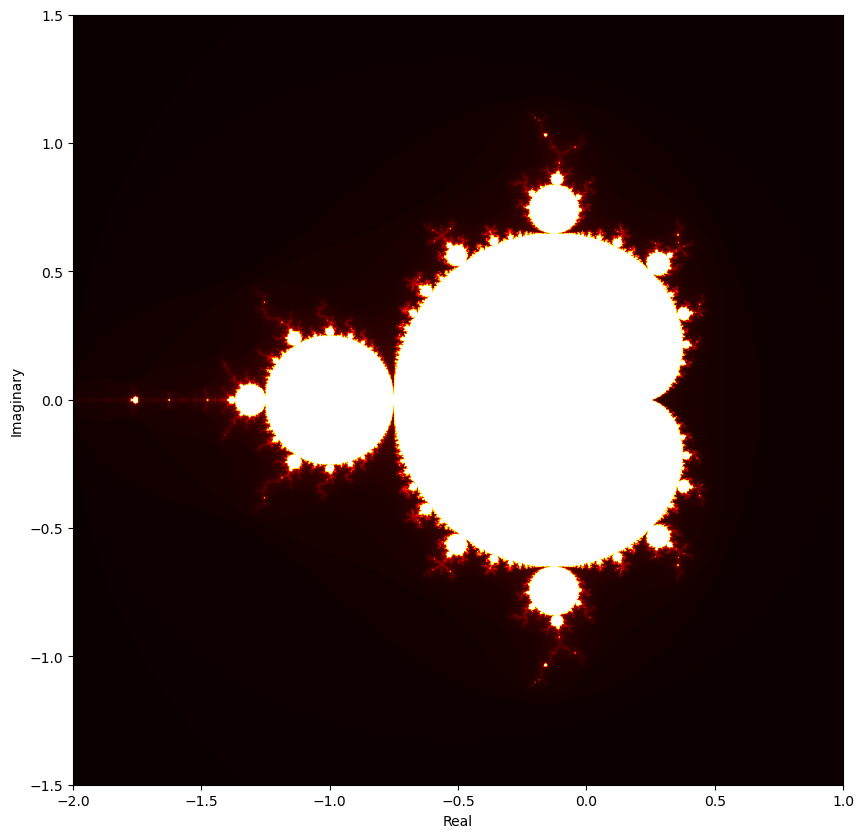

In [4]:
# Visualize with interpolation
plt.figure(figsize=(10, 10))
plt.imshow(image.T, cmap='hot', interpolation='bilinear', extent=[-2, 1, -1.5, 1.5])
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

In [5]:
from scipy.interpolate import pchip_interpolate
from matplotlib.colors import LinearSegmentedColormap

def custom_colourmap():
    #set up the control points for your gradient
    yR_observed = [0, 0,32,237, 255, 0, 0, 32]
    yG_observed = [2, 7, 107, 255, 170, 2, 7, 107]
    yB_observed = [0, 100, 203, 255, 0, 0, 100, 203]

    x_observed = [-.1425, 0, .16, .42, .6425, .8575, 1, 1.16]

    #Create the arrays with the interpolated values
    x = np.linspace(min(x_observed), max(x_observed), num=1000)
    yR = pchip_interpolate(x_observed, yR_observed, x)
    yG = pchip_interpolate(x_observed, yG_observed, x)
    yB = pchip_interpolate(x_observed, yB_observed, x)

    #Convert them back to python lists
    x = list(x)
    yR = list(yR)
    yG = list(yG)
    yB = list(yB)

    #Find the indexs where x crosses 0 and crosses 1 for slicing
    start = 0
    end = 0
    for i in x:
        if i > 0:
            start = x.index(i)
            break

    for i in x:
        if i > 1:
            end = x.index(i)
            break

    #Slice away the helper data in the begining and end leaving just 0 to 1
    x = x[start:end]
    yR = yR[start:end]
    yG = yG[start:end]
    yB = yB[start:end]

    # Normalize the color values to the [0, 1] range
    yR = np.array(yR) / 255.0
    yG = np.array(yG) / 255.0
    yB = np.array(yB) / 255.0

    # Append 0 to the end of yR, yG, and yB
    yR = np.append(yR, 0.0)
    yG = np.append(yG, 0.0)
    yB = np.append(yB, 0.0)

    # Create a custom colormap from the interpolated color values
    colors = np.column_stack((yR, yG, yB))  # Combine R, G, and B values
    cmap = LinearSegmentedColormap.from_list('custom_colormap', colors, N=256)
    
    return cmap


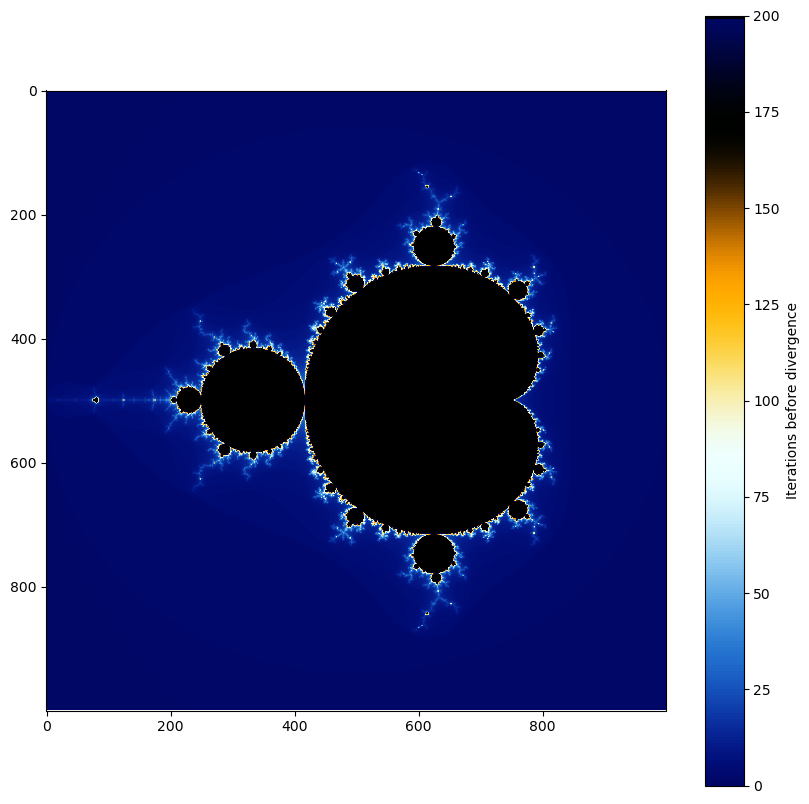

In [6]:
cmap = custom_colourmap()

# Create a figure and plot the data using the custom colormap
plt.figure(figsize=(10, 10))
plt.imshow(image.T, cmap=cmap)
plt.colorbar().set_label('Iterations before divergence')
plt.show()

In [85]:
# Set parameters for the area estimation
num_samples = 100000
max_iter_range_adjusted = np.arange(100, 6000, 100)
real_range = [-2, 1]
imag_range = [-1.5, 1.5]

# Define the pure random sampling function
def pure_random_sampling(num_samples, real_range, imag_range):
    real_samples = np.random.uniform(real_range[0], real_range[1], num_samples)
    imag_samples = np.random.uniform(imag_range[0], imag_range[1], num_samples)
    return real_samples + 1j * imag_samples

# Define a function to estimate the area of the Mandelbrot set using sampling
def estimate_area(samples, max_iter):
    inside_count = 0
    for c in samples:
        if stability(c, max_iter) == max_iter:
            inside_count += 1
    area = (real_range[1] - real_range[0]) * (imag_range[1] - imag_range[0]) * inside_count / num_samples
    return area

# Define a function to calculate the convergence of areas for different values of max_iter
def convergence_curve(samples, max_iter_range):
    areas = []
    times = []
    
    for max_iter in max_iter_range:
        start_time = time()
        area = estimate_area(samples, max_iter)
        times.append(time() - start_time)
        areas.append(area)
    
    return areas, times

# Run the pure random sampling once and store the samples
pure_random_samples = pure_random_sampling(num_samples, real_range, imag_range)

# Calculate the convergence curve for pure random sampling with adjusted range
areas_pure_random, times_pure_random = convergence_curve(
    pure_random_samples,
    max_iter_range_adjusted
)



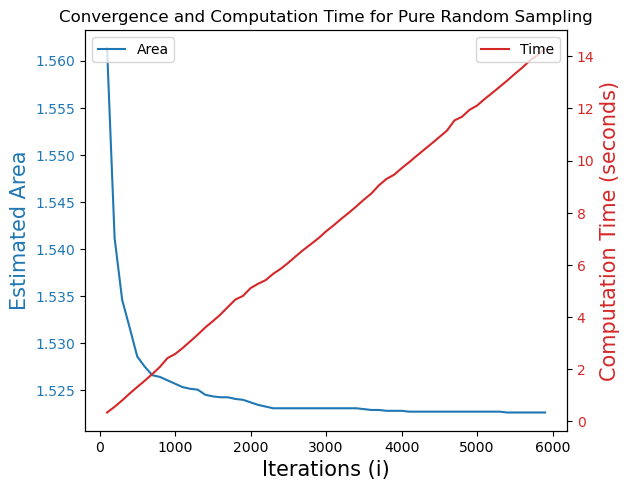

In [79]:
# Create the plot with two y-axes for pure random sampling only
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Iterations (i)', fontsize=15)
ax1.set_ylabel('Estimated Area', color=color, fontsize=15)
ax1.plot(max_iter_range_adjusted, areas_pure_random, label='Area', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Computation Time (seconds)', color=color, fontsize=15)  # we already handled the x-label with ax1
ax2.plot(max_iter_range_adjusted, times_pure_random, label='Time', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Convergence and Computation Time for Pure Random Sampling')
plt.show()

### Find the smallest i that meets the desired_relative_error(0.1%)

In [80]:
desired_relative_error = 0.001  # 0.1% relative error
# Initialize the minimum i and relative error
min_i = 1
min_i_relative_error = None
Am =  areas_pure_random[-1] # make the biggest i and s combination the Am

# Find the minimum i that satisfies the desired relative error
for i, area in enumerate(areas_pure_random):
    relative_error = abs(area - Am) / Am
    min_i = max_iter_range_adjusted[i]
    print(f"i = {max_iter_range_adjusted[i]}, relative error = {relative_error*100}%")
    if relative_error > desired_relative_error:
        min_i = max_iter_range_adjusted[i]
        min_i_relative_error = relative_error
    else:
        min_i_relative_error = relative_error
        break

print(f"$A_m$ is {Am}")
print(f"The minimum i that satisfies the desired relative error of {desired_relative_error*100}% is {min_i}.")
print(f"The relative error achieved is {min_i_relative_error*100}%.")


i = 100, relative error = 2.541671592386804%
i = 200, relative error = 1.2176380186783309%
i = 300, relative error = 0.7861449343893955%
i = 400, relative error = 0.5910864168341343%
i = 500, relative error = 0.39011703511052226%
i = 600, relative error = 0.3191866650904273%
i = 700, relative error = 0.2600780234070197%
i = 800, relative error = 0.24825629507033237%
i = 900, relative error = 0.22461283839697224%
i = 1000, relative error = 0.2009693817235975%
i = 1100, relative error = 0.1773259250502374%
i = 1200, relative error = 0.16550419671355002%
i = 1300, relative error = 0.15959333254521366%
i = 1400, relative error = 0.12412814753516618%
i = 1500, relative error = 0.11230641919847881%
i = 1600, relative error = 0.10639555503014243%
i = 1700, relative error = 0.10639555503014243%
i = 1800, relative error = 0.09457382669345507%
$A_m$ is 1.52262
The minimum i that satisfies the desired relative error of 0.1% is 1800.
The relative error achieved is 0.09457382669345507%.


In [81]:
# Define the parameters for the area estimation
num_samples_start = 1000  # Start with a small number of samples
num_samples_max = 100000 # Set a reasonable upper limit for samples
max_iter = 1800
desired_d = 0.001
real_range = [-2, 1]
imag_range = [-1.5, 1.5]

# Initialize variables for the iterative process
num_samples = num_samples_start
previous_area = 0
relative_error = float('inf')

# Iteratively increase the number of samples until the desired d is achieved
while relative_error > desired_d and num_samples <= num_samples_max:
    samples = pure_random_sampling(num_samples, real_range, imag_range)
    current_area = estimate_area(samples, max_iter)
    relative_error = abs(Am - current_area) / Am 
    print(f"Number of samples: {num_samples}, Estimated Area: {current_area}, Relative Error: {relative_error}")
    previous_area = current_area
    num_samples += 1000  # Double the number of samples for the next iteration

# The minimum number of samples required to achieve the desired d
min_s = num_samples - 1000 # Adjust because the loop doubles the samples at the end

print(f"The minimum number of samples required for d = {desired_d} with i = {max_iter} is {min_s}.")

Number of samples: 1000, Estimated Area: 1.656, Relative Error: 0.08759900697481961
Number of samples: 2000, Estimated Area: 1.5345, Relative Error: 0.007802340702210591
Number of samples: 3000, Estimated Area: 1.566, Relative Error: 0.028490365291405584
Number of samples: 4000, Estimated Area: 1.503, Relative Error: 0.012885683886984403
Number of samples: 5000, Estimated Area: 1.449, Relative Error: 0.04835086889703276
Number of samples: 6000, Estimated Area: 1.5165, Relative Error: 0.004019387634472242
Number of samples: 7000, Estimated Area: 1.4708571428571429, Relative Error: 0.033995913059632225
Number of samples: 8000, Estimated Area: 1.614375, Relative Error: 0.06026126019624056
Number of samples: 9000, Estimated Area: 1.444, Relative Error: 0.051634682323889174
Number of samples: 10000, Estimated Area: 1.5633, Relative Error: 0.026717106040903067
Number of samples: 11000, Estimated Area: 1.498909090909091, Relative Error: 0.01557244032713948
Number of samples: 12000, Estimated 

In [75]:
# Define the parameters for the area estimation
num_samples_start = 1000  # Initial number of samples
num_samples_max = 10000000  # Maximum number of samples
max_iter = 1700
desired_d = 0.002  # Desired standard deviation
real_range = [-2, 1]
imag_range = [-1.5, 1.5]

# Initialize variables for the iterative process
num_samples = num_samples_start
sample_areas = []

# Function to perform the pure random sampling and area estimation
def perform_sampling_and_estimate(num_samples, max_iter):
    samples = pure_random_sampling(num_samples, real_range, imag_range)
    area = estimate_area(samples, max_iter)
    return area

while num_samples <= num_samples_max:
    # Estimate the area with the current number of samples
    current_area = perform_sampling_and_estimate(num_samples, max_iter)
    sample_areas.append(current_area)
    
    # Calculate the standard deviation of the sample areas
    if len(sample_areas) > 1:
        S = np.std(sample_areas, ddof=1)  # ddof=1 for sample standard deviation
        S_over_sqrt_k = S / np.sqrt(num_samples)
        
        print(f"Number of samples: {num_samples}, Estimated Area: {current_area}, S: {S}, S/sqrt(k): {S_over_sqrt_k}")
        
        # Check if the standard deviation over sqrt of k is less than desired d
        if S_over_sqrt_k <= desired_d:
            break
    
    # Increase the number of samples for the next iteration
    num_samples += 1000

# The minimum number of samples required to achieve the desired d
min_s = num_samples

print(f"The minimum number of samples required for d = {desired_d} with i = {max_iter} is {min_s}.")

Number of samples: 2000, Estimated Area: 1.4985, S: 0.1304612011289181, S/sqrt(k): 0.0029172011415053317
Number of samples: 3000, Estimated Area: 1.512, S: 0.10284575829853174, S/sqrt(k): 0.0018776980587943322
The minimum number of samples required for d = 0.002 with i = 1700 is 3000.


Number of samples: 1000, Estimated Area: 1.584, Relative Error: 0.040312093628088415
Number of samples: 2000, Estimated Area: 1.413, Relative Error: 0.07199432557039842
Number of samples: 3000, Estimated Area: 1.581, Relative Error: 0.03834180557197454
Number of samples: 4000, Estimated Area: 1.55925, Relative Error: 0.024057217165149504
Number of samples: 5000, Estimated Area: 1.5534, Relative Error: 0.0202151554557275
Number of samples: 6000, Estimated Area: 1.482, Relative Error: 0.026677700279780968
Number of samples: 7000, Estimated Area: 1.4387142857142856, Relative Error: 0.05510614223228019
Number of samples: 8000, Estimated Area: 1.5525, Relative Error: 0.019624069038893424
Number of samples: 9000, Estimated Area: 1.515, Relative Error: 0.005004531662529181
Number of samples: 10000, Estimated Area: 1.4805, Relative Error: 0.027662844307837907
Number of samples: 11000, Estimated Area: 1.5193636363636365, Relative Error: 0.0021386581263635133
Number of samples: 12000, Estimated 

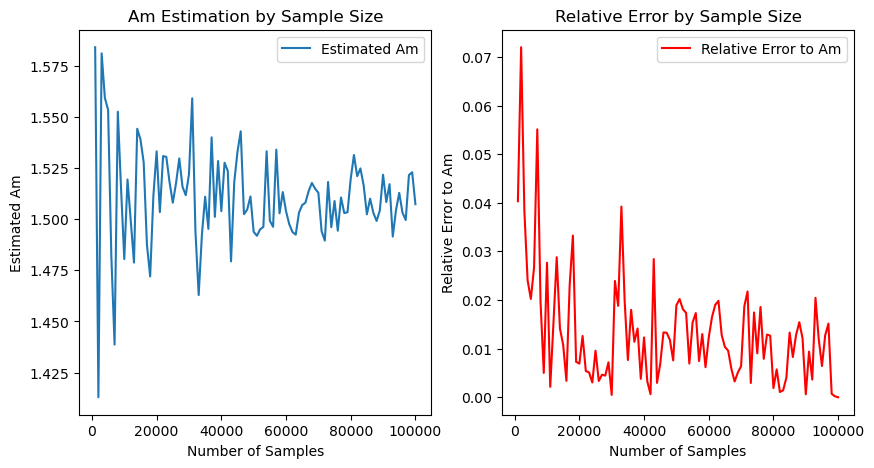

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Assuming the stability function and other necessary functions are defined elsewhere and imported

# Define the parameters for the area estimation
num_samples_start = 1000
num_samples_max = 100000
max_iter = 1700
desired_d = 0.001
real_range = [-2, 1]
imag_range = [-1.5, 1.5]

# Initialize variables for the iterative process
num_samples = num_samples_start
Am_estimations = []
relative_errors = []
sample_sizes = []

# Main iterative process
while num_samples <= num_samples_max:
    # Generate samples and estimate area
    samples = pure_random_sampling(num_samples, real_range, imag_range)
    current_area = estimate_area(samples, max_iter)
    
    # Assume Am is the area estimated with the maximum number of samples
    if num_samples == num_samples_max:
        Am = current_area
    
    # Calculate relative error
    relative_error = abs(Am - current_area) / Am
    relative_errors.append(relative_error)
    Am_estimations.append(current_area)
    sample_sizes.append(num_samples)
    
    print(f"Number of samples: {num_samples}, Estimated Area: {current_area}, Relative Error: {relative_error}")
    
    # Update num_samples for next iteration
    num_samples += 1000

# Plotting the results
plt.figure(figsize=(10, 5))

# Plot Am estimations
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, Am_estimations, label='Estimated Am')
plt.xlabel('Number of Samples')
plt.ylabel('Estimated Am')
plt.title('Am Estimation by Sample Size')
plt.legend()

# Plot relative errors
plt.subplot(1, 2, 2)
plt.plot(sample_sizes, relative_errors, label='Relative Error to Am', color='red')
plt.xlabel('Number of Samples')
plt.ylabel('Relative Error to Am')
plt.title('Relative Error by Sample Size')
plt.legend()

Number of samples: 1000, Estimated Area: 1.485, Relative Error: 0.014984180048952227
Number of samples: 2000, Estimated Area: 1.512, Relative Error: 0.0029251984956122187
Number of samples: 3000, Estimated Area: 1.524, Relative Error: 0.01088492229319645
Number of samples: 4000, Estimated Area: 1.422, Relative Error: 0.05677272998626951
Number of samples: 5000, Estimated Area: 1.4706, Relative Error: 0.02453584860605342
Number of samples: 6000, Estimated Area: 1.545, Relative Error: 0.02481443893896878
Number of samples: 7000, Estimated Area: 1.578857142857143, Relative Error: 0.047272231082152956
Number of samples: 8000, Estimated Area: 1.456875, Relative Error: 0.03363978269954037
Number of samples: 9000, Estimated Area: 1.474, Relative Error: 0.02228059353007118
Number of samples: 10000, Estimated Area: 1.5417, Relative Error: 0.022625514894633214
Number of samples: 11000, Estimated Area: 1.4841818181818183, Relative Error: 0.015526888489696614
Number of samples: 12000, Estimated Ar

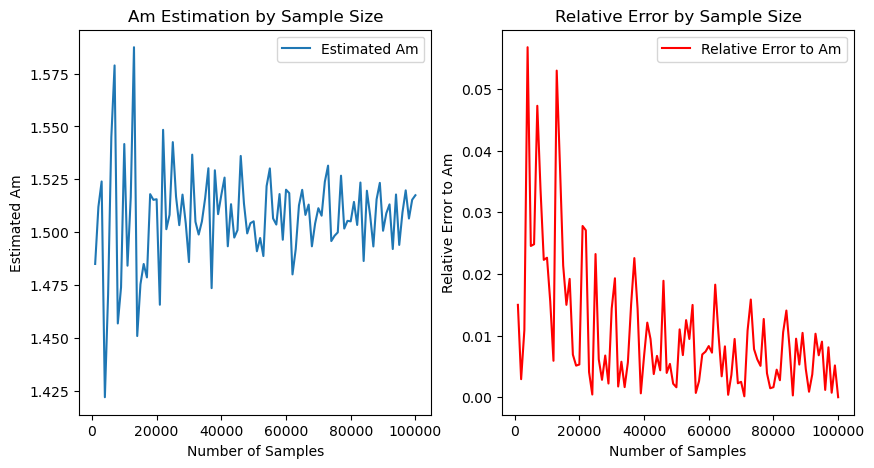

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Assuming the stability function and other necessary functions are defined elsewhere and imported

# Define the parameters for the area estimation
num_samples_start = 1000
num_samples_max = 100000
max_iter = 3000
desired_d = 0.001
real_range = [-2, 1]
imag_range = [-1.5, 1.5]

# Initialize variables for the iterative process
num_samples = num_samples_start
Am_estimations = []
relative_errors = []
sample_sizes = []

# Main iterative process
while num_samples <= num_samples_max:
    # Generate samples and estimate area
    samples = pure_random_sampling(num_samples, real_range, imag_range)
    current_area = estimate_area(samples, max_iter)
    
    # Assume Am is the area estimated with the maximum number of samples
    if num_samples == num_samples_max:
        Am = current_area
    
    # Calculate relative error
    relative_error = abs(Am - current_area) / Am
    relative_errors.append(relative_error)
    Am_estimations.append(current_area)
    sample_sizes.append(num_samples)
    
    print(f"Number of samples: {num_samples}, Estimated Area: {current_area}, Relative Error: {relative_error}")
    
    # Update num_samples for next iteration
    num_samples += 1000

# Plotting the results
plt.figure(figsize=(10, 5))

# Plot Am estimations
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, Am_estimations, label='Estimated Am')
plt.xlabel('Number of Samples')
plt.ylabel('Estimated Am')
plt.title('Am Estimation by Sample Size')
plt.legend()

# Plot relative errors
plt.subplot(1, 2, 2)
plt.plot(sample_sizes, relative_errors, label='Relative Error to Am', color='red')
plt.xlabel('Number of Samples')
plt.ylabel('Relative Error to Am')
plt.title('Relative Error by Sample Size')
plt.legend()

In [87]:
from scipy.stats import norm

# Set parameters for the area estimation
i = 1800  # Number of iterations
s = 5000  # Start with a small number of samples
confidence_level = 0.99
z_score = norm.ppf((1 + confidence_level) / 2)

# Initialize lists to store statistics
sample_means = []
sample_stds = []
confidence_intervals = []

# Start the process to calculate the minimum s
while True:
    # Estimate the area for the current number of samples
    area_estimates = [estimate_area(s,i) for _ in range(30)]  # Perform 30 simulations
    
    # Calculate mean and standard deviation of the estimates
    mean_estimate = np.mean(area_estimates)
    std_estimate = np.std(area_estimates, ddof=1)
    
    # Calculate the margin of error for the 99% confidence interval
    margin_of_error = z_score * (std_estimate / np.sqrt(s))
    
    # Calculate and store the confidence interval
    confidence_interval = (mean_estimate - margin_of_error, mean_estimate + margin_of_error)
    confidence_intervals.append(confidence_interval)
    
    # Check if the confidence interval is sufficiently narrow (optional)
    interval_width = confidence_interval[1] - confidence_interval[0]
    if interval_width < some_threshold:  # Replace `some_threshold` with your chosen value
        break
    
    # Increase the number of samples for the next iteration
    s += 1000  # Increment s as needed

# Output the minimum number of samples required
min_s = s
confidence_interval_at_min_s = confidence_intervals[-1]
print(f"The minimum number of samples required for a 99% confidence level is {min_s}.")
print(f"The confidence interval at this sample size is {confidence_interval_at_min_s}.")


TypeError: 'int' object is not iterable